## **DRIVER DROWSINESS DETECTION USING ALARM SYSTEM**

Importing Libraries

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("3.png" , cv2.IMREAD_GRAYSCALE)

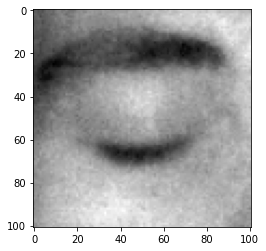

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(101, 101)

In [5]:
!unzip train.zip

Archive:  train.zip
replace train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

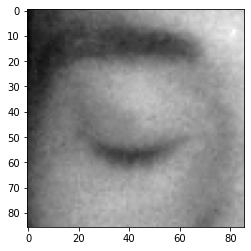

In [5]:
Datadirectory = 'train'
Classes = ['Closed_Eyes', 'Open_Eyes']

for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

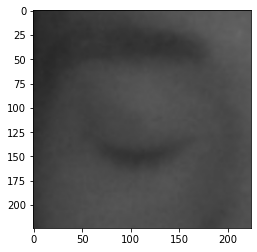

In [6]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [7]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass
   

In [8]:
create_training_data()

In [9]:
print(len(training_data))

4000


In [10]:
import random
random.shuffle(training_data)

Creating features and Labels

In [11]:
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
X

array([[[[ 90,  90,  90],
         [ 90,  90,  90],
         [ 89,  89,  89],
         ...,
         [214, 214, 214],
         [215, 215, 215],
         [216, 216, 216]],

        [[ 88,  88,  88],
         [ 87,  87,  87],
         [ 86,  86,  86],
         ...,
         [214, 214, 214],
         [215, 215, 215],
         [216, 216, 216]],

        [[ 85,  85,  85],
         [ 84,  84,  84],
         [ 82,  82,  82],
         ...,
         [213, 213, 213],
         [214, 214, 214],
         [215, 215, 215]],

        ...,

        [[164, 164, 164],
         [166, 166, 166],
         [168, 168, 168],
         ...,
         [193, 193, 193],
         [193, 193, 193],
         [193, 193, 193]],

        [[158, 158, 158],
         [161, 161, 161],
         [164, 164, 164],
         ...,
         [191, 191, 191],
         [191, 191, 191],
         [191, 191, 191]],

        [[154, 154, 154],
         [157, 157, 157],
         [161, 161, 161],
         ...,
         [189, 189, 189],
        

In [11]:
X.shape

(4000, 224, 224, 3)

Converting values in the range of 0 to 1

In [14]:
X=X/255.0;
X

array([[[[0.18039216, 0.18039216, 0.18039216],
         [0.18431373, 0.18431373, 0.18431373],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.42352941, 0.42352941, 0.42352941],
         [0.42352941, 0.42352941, 0.42352941],
         [0.42352941, 0.42352941, 0.42352941]],

        [[0.18039216, 0.18039216, 0.18039216],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18431373, 0.18431373, 0.18431373],
         ...,
         [0.42352941, 0.42352941, 0.42352941],
         [0.42352941, 0.42352941, 0.42352941],
         [0.42352941, 0.42352941, 0.42352941]],

        [[0.18039216, 0.18039216, 0.18039216],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18431373, 0.18431373, 0.18431373],
         ...,
         [0.42745098, 0.42745098, 0.42745098],
         [0.42745098, 0.42745098, 0.42745098],
         [0.42745098, 0.42745098, 0.42745098]],

        ...,

        [[0.16470588, 0.16470588, 0.16470588],
         [0.16862745, 0.16862745, 0.16862745]

In [12]:
Y=np.array(y)
Y

array([0, 1, 1, ..., 1, 1, 1])

Model Training

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-4].output

In [21]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)


In [22]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [24]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [25]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.3)

Epoch 1/2
88/88 [==============================] - 46s 384ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 3.3369 - val_accuracy: 0.7425
Epoch 2/2
88/88 [==============================] - 31s 354ms/step - loss: 0.0154 - accuracy: 0.9964 - val_loss: 0.0249 - val_accuracy: 0.9967


In [26]:
new_model.save('mymmodel.h5')

Prediction on images

For open - 1         
For close - 0

In [13]:
new_model = tf.keras.models.load_model('mymmodel.h5')

In [14]:
img_array = cv2.imread('train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))


In [15]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [16]:
X_input.shape

(1, 224, 224, 3)

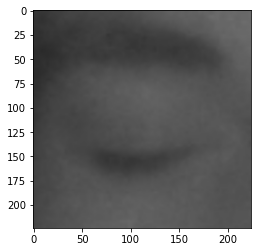

In [17]:
plt.imshow(new_array)

In [18]:
X_input = X_input/255.0

In [33]:
prediction = new_model.predict(X_input)
prediction

array([[1.3101136e-17]], dtype=float32)

In [19]:
img_array = cv2.imread('4.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [20]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [21]:
X_input.shape

(1, 224, 224, 3)

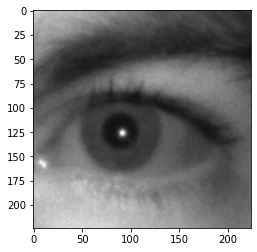

In [22]:
plt.imshow(new_array)

In [46]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[1.]], dtype=float32)

Prediction using Haarcascade Classifiers on unknown faces

In [23]:
img = cv2.imread("1.png")

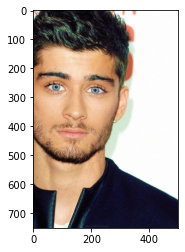

In [24]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

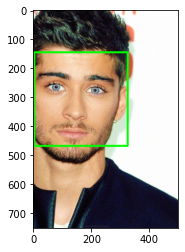

In [25]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
faces_rect = face_cascade.detectMultiScale(gray_img, 1.1, 9)
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

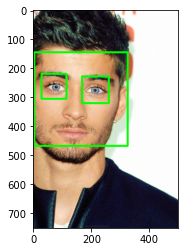

In [26]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    cv2.rectangle(img , (x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Crop the image

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) ==0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex + ew]
            
    

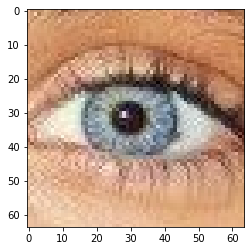

In [28]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [29]:
eyes_roi.shape

(64, 64, 3)

In [30]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

In [31]:
final_image.shape

(1, 224, 224, 3)

In [56]:
pred = new_model.predict(final_image)
print(pred)
if pred>0.5:
    print("Open Eyes")
else:
    print("Close Eyes")


[[1.]]
Open Eyes


In [128]:
img1 = cv2.imread("10.jpg")

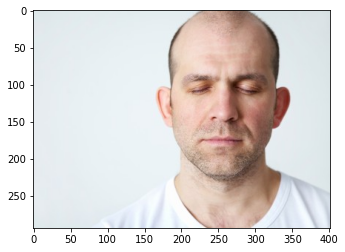

In [129]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

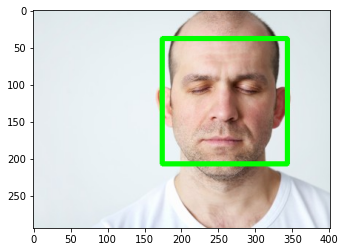

In [130]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 
faces_rect = face_cascade.detectMultiScale(gray_img, 1.1, 9)
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 5)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

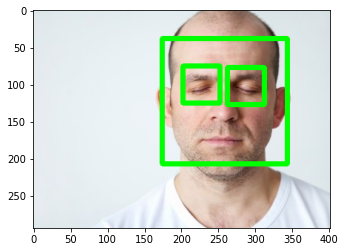

In [131]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    cv2.rectangle(img1 , (x,y),(x+w,y+h),(0,255,0),5)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

In [132]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img1[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) ==0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex + ew]

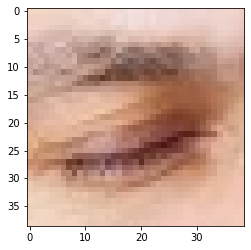

In [133]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [135]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0
final_image.shape

(1, 224, 224, 3)

In [136]:
pred = new_model.predict(final_image)
print(pred)
if pred>0.5:
    print("Open Eyes")
else:
    print("Close Eyes")


[[2.1127666e-13]]
Close Eyes


In [32]:
new_model = tf.keras.models.load_model('mymodel1.h5')

In [39]:
import cv2
# import winsound
from gtts import gTTS
from playsound import playsound
import copy
import imutils
# frequency = 2500
# duration = 1000
myText0 = "Welcome to Driver drowsiness Detection system, Please turn off your mobile phones and tie your sit belts before driving "
output0 = gTTS(text=myText0,lang='en',slow=False)
output0.save("OUTPUT.mp3")
playsound('OUTPUT.mp3')
os.remove("OUTPUT.mp3")
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
counter=0
while cap.isOpened():
    _,Frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = Frame[ y:y+h, x:x+w]
        cv2.rectangle(Frame, (x,y), (x+w, y+h), (0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh,ex:ex +ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    Predictions = new_model.predict(final_image)
    if(Predictions>0.40):
        status = " Open Eyes"
        print(Predictions)
    else:
        status = "Closed Eyes"
        print(Predictions)
        counter = counter+1
        if counter>10:
            status = "Alert"
            cv2.putText(Frame,status,(110,50),font,1.5,(255,0,0),3)
#             winsound.Beep(frequency,duration)
            playsound("countdown.mp3")
            counter = 0
    gray = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        cv2.rectangle(img , (x,y),(x+w,y+h),(0,255,0),2)

    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(Frame,status,(110,50),font,1.5,(0,255,0),3)
    cv2.imshow("Drowsiness Detection",Frame)
    if cv2.waitKey(1)==ord('q'):
        break

myText1 = "Thank you for using our system, Have a nice day"
output1 = gTTS(text=myText1,lang='en',slow=False)
output1.save("OUTPUT1.mp3")
playsound('OUTPUT1.mp3')
os.remove("OUTPUT1.mp3")
cap.release()
cv2.destroyAllWindows()


Eyes are not detected
Eyes are not detected
[[0.06076965]]
False
[[1.]]
False
Eyes are not detected
[[0.9623303]]
False
Eyes are not detected
[[0.99999523]]
False
[[1.]]
False
Eyes are not detected
[[0.99981046]]
False
Eyes are not detected
[[0.9999771]]
False
[[0.05976626]]
False
[[0.9957322]]
False
Eyes are not detected
[[0.5711956]]
False
[[0.724956]]
False
[[0.26681754]]
False
[[0.04273263]]
False
[[0.6576444]]
False
[[0.99984545]]
False
[[0.9985103]]
False
[[0.7268044]]
False
[[0.70428497]]
False
[[0.99963486]]
False
[[0.9624962]]
False
[[0.6040679]]
False
[[0.98739743]]
False
[[0.88527775]]
False
[[0.54752517]]
False
Eyes are not detected
Eyes are not detected
[[0.54752517]]
False
Eyes are not detected
[[0.16093314]]
False
Eyes are not detected
Eyes are not detected
[[0.8915007]]
False
[[0.00225234]]
False
[[0.804845]]
False
[[0.99799454]]
False
Eyes are not detected
[[0.20698434]]
False
[[0.8765719]]
False
[[0.9800693]]
False
[[0.11958322]]
False
[[0.98108995]]
False
Eyes are no

False
Eyes are not detected
Eyes are not detected
[[0.03101763]]
False
[[0.26454318]]
False
[[0.73579276]]
False
Eyes are not detected
[[0.999939]]
False
[[0.17400673]]
False
[[0.54675347]]
False
[[0.04038957]]
False
[[0.1834785]]
False
[[0.7141839]]
False
[[0.01873282]]
False
[[0.60354877]]
False
Eyes are not detected
[[0.60354877]]
False
Eyes are not detected
Eyes are not detected
[[1.]]
False
Eyes are not detected
[[1.]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[1.]]
False
[[0.09535667]]
False
Eyes are not detected
Eyes are not detected
[[0.09535667]]
False
Eyes are not detected
Eyes are not detected
[[0.09535667]]
False
Eyes are not detected
Eyes are not detected
[[0.09535667]]
False
Eyes are not detected
[[0.09535667]]
False
[[0.9985573]]
False
[[0.5854503]]
False
[[0.28629273]]
False
[[0.6879289]]
False
[[0.13817805]]
False
[[0.69272953]]
False
[[0.08870041]]
False
[[0.146977]]
False
[[0.52228206]]
False
Eyes are not detected
[[0.99915177]]
False
E

False
Eyes are not detected
Eyes are not detected
[[0.8005874]]
False
Eyes are not detected
Eyes are not detected
[[0.8005874]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[0.8005874]]
False
Eyes are not detected
[[0.8005874]]
False
Eyes are not detected
[[0.8005874]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[0.8005874]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[0.8005874]]
False
Eyes are not detected
[[0.03352809]]
False
[[0.3623715]]
False
Eyes are not detected
Eyes are not detected
Eyes are not detected
[[0.3623715]]
False
Eyes are not detected
Eyes are not detected
[[0.8215859]]
False
Eyes are not detected
[[0.16767862]]
False
Eyes are not detected
[[0.40175086]]
False
Eyes are not detected
[[0.27091748]]
False


In [39]:
import cv2
# import winsound
from gtts import gTTS
from playsound import playsound
import copy
import imutils
# frequency = 2500
# duration = 1000
myText0 = "Welcome to Driver drowsiness Detection system, Please turn off your mobile phones and tie your sit belts before driving "
output0 = gTTS(text=myText0,lang='en',slow=False)
output0.save("OUTPUT.mp3")
playsound('OUTPUT.mp3')
os.remove("OUTPUT.mp3")
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
counter=0
while cap.isOpened():
    _,Frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_img = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY) 
    faces_rect = face_cascade.detectMultiScale(gray_img, 1.1, 9)
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(Frame, (x, y), (x+w, y+h), (0, 255, 0), 5)
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = Frame[ y:y+h, x:x+w]
        cv2.rectangle(Frame, (x,y), (x+w, y+h), (0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh,ex:ex +ew]
                
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    final_image = final_image/255.0
    Predictions = new_model.predict(final_image)
    if(Predictions>0.40):
        status = " Open Eyes"
        print(Predictions)
    else:
        status = "Closed Eyes"
        print(Predictions)
        counter = counter+1
        if counter>10:
            status = "Alert"
            cv2.putText(Frame,status,(110,50),font,1.5,(255,0,0),3)
#             winsound.Beep(frequency,duration)
            playsound("countdown.mp3")
            counter = 0
    gray = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h) in eyes:
        cv2.rectangle(img , (x,y),(x+w,y+h),(0,255,0),2)

    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(Frame,status,(110,50),font,1.5,(0,255,0),3)
    cv2.imshow("Drowsiness Detection",Frame)
    if cv2.waitKey(1)==ord('q'):
        break

myText1 = "Thank you for using our system, Have a nice day"
output1 = gTTS(text=myText1,lang='en',slow=False)
output1.save("OUTPUT1.mp3")
playsound('OUTPUT1.mp3')
os.remove("OUTPUT1.mp3")
cap.release()
cv2.destroyAllWindows()


Eyes are not detected
[[0.00114608]]
False
[[0.9998027]]
False
[[0.04783839]]
False
[[0.93428946]]
False
Eyes are not detected
[[0.6040119]]
False
[[0.34275395]]
False
Eyes are not detected
[[0.9935411]]
False
[[0.00080267]]
False
[[0.9960041]]
False
[[0.98577106]]
False
[[0.9998579]]
False
Eyes are not detected
[[0.16036925]]
False
Eyes are not detected
[[3.8120133e-06]]
False
Eyes are not detected
[[0.8284873]]
False
Eyes are not detected
[[0.14691097]]
False
[[0.8378831]]
False
[[0.00052443]]
False
[[0.0179933]]
False
Eyes are not detected
[[0.0179933]]
False
Eyes are not detected
[[0.0179933]]
False
Eyes are not detected
[[0.99979365]]
False
Eyes are not detected
Eyes are not detected
[[0.99340075]]
False
[[0.9933209]]
False
[[0.9920413]]
False
[[0.9996536]]
False
[[0.99999917]]
False
[[0.99968535]]
False
[[0.99999785]]
False
Eyes are not detected
Eyes are not detected
[[0.99999785]]
False
Eyes are not detected
Eyes are not detected
[[0.99999785]]
False
Eyes are not detected
Eyes a